<a href="https://colab.research.google.com/github/fadhilahmad11/Machine-Learning/blob/main/03.%20Week%203/Regression_Infrared_Dataset_using_K_NN_and_Decision_Tree_W3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Infrared.csv')
display(df.head())
display(df.tail())
print(df.shape)

Saving Infrared.csv to Infrared (1).csv


,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,37.04


,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
1015,Female,21-25,Asian,25.7,50.8,0.6,1.2225,35.6425,35.6525,34.8575,...,35.3475,35.4000,35.1375,35.2750,35.8525,35.7475,36.0675,35.6775,35.7100,36.99
1016,Female,21-25,White,25.7,50.8,0.6,1.4675,35.9825,35.7575,35.4275,...,35.2175,35.2200,35.2075,35.0700,35.7650,35.5525,36.5000,36.4525,36.4900,37.19
1017,Female,18-20,Black or African-American,28.0,24.3,0.6,0.1300,36.4075,36.3400,35.8700,...,35.2400,35.2275,35.3675,35.3425,36.3750,35.7100,36.5350,35.9650,35.9975,37.59
1018,Male,26-30,Hispanic/Latino,25.0,39.8,0.6,1.2450,35.8150,35.5250,34.2950,...,35.0200,34.9250,34.7150,34.5950,35.4150,35.3100,35.8600,35.4150,35.4350,37.29
1019,Female,18-20,White,23.8,45.6,0.6,0.8675,35.7075,35.5825,34.8875,...,34.6500,34.6700,34.2150,34.7100,35.1525,35.1175,35.9725,35.8900,35.9175,37.19


(1020, 34)


## Data exploration

Shape of the data: (1020, 34)

Data types of each column:
 Gender          object
Age             object
Ethnicity       object
T_atm          float64
Humidity       float64
Distance       float64
T_offset1      float64
Max1R13_1      float64
Max1L13_1      float64
aveAllR13_1    float64
aveAllL13_1    float64
T_RC1          float64
T_RC_Dry1      float64
T_RC_Wet1      float64
T_RC_Max1      float64
T_LC1          float64
T_LC_Dry1      float64
T_LC_Wet1      float64
T_LC_Max1      float64
RCC1           float64
LCC1           float64
canthiMax1     float64
canthi4Max1    float64
T_FHCC1        float64
T_FHRC1        float64
T_FHLC1        float64
T_FHBC1        float64
T_FHTC1        float64
T_FH_Max1      float64
T_FHC_Max1     float64
T_Max1         float64
T_OR1          float64
T_OR_Max1      float64
aveOralM       float64
dtype: object

Descriptive statistics:
              T_atm     Humidity     Distance    T_offset1    Max1R13_1  \
count  1020.000000  1020.000000  1018.000000 

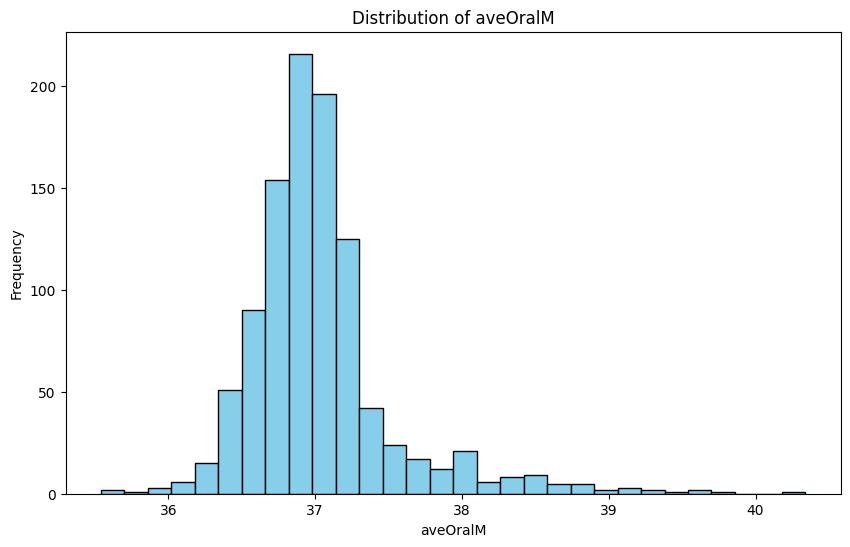

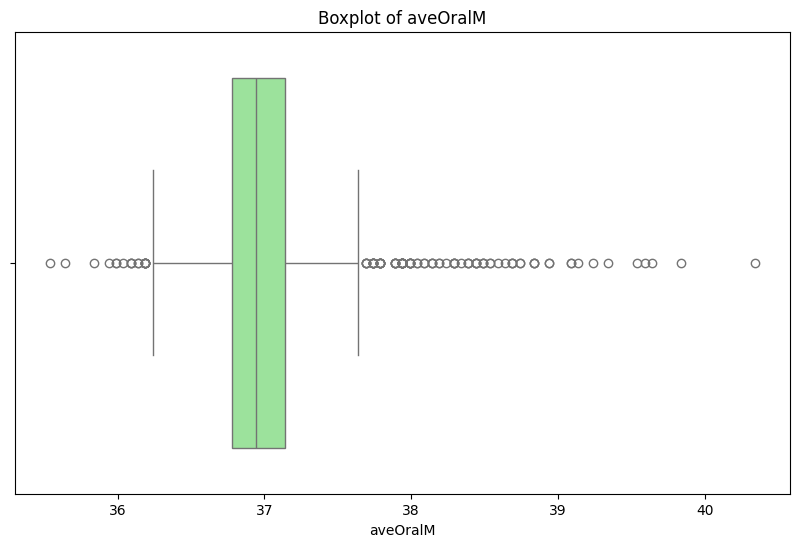

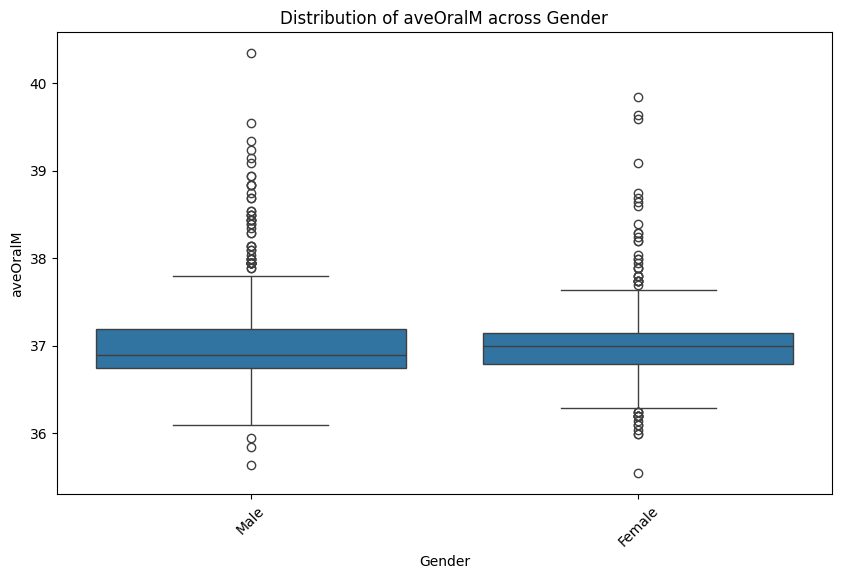

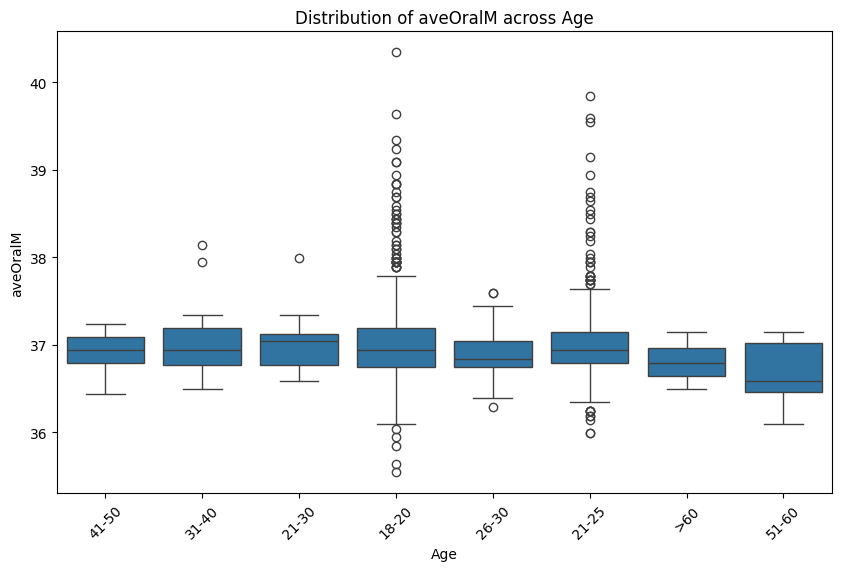

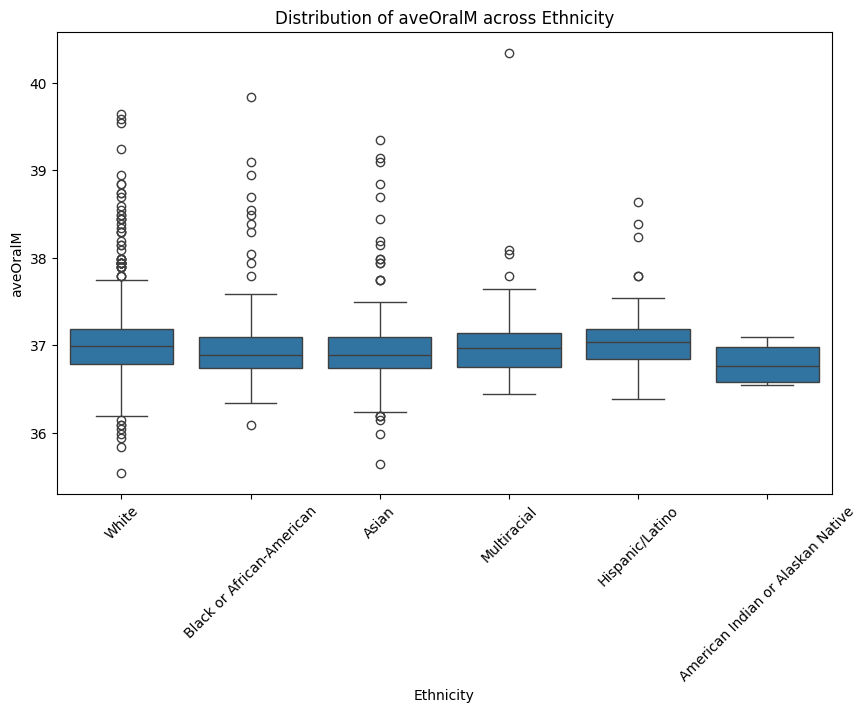

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Shape of the data:", df.shape)
print("\nData types of each column:\n", df.dtypes)

print("\nDescriptive statistics:\n", df.describe())
print("\nDescriptive statistics for 'aveOralM':\n", df['aveOralM'].describe())

print("\nMissing values per column:\n", df.isnull().sum())
print("\nPercentage of missing values per column:\n", (df.isnull().sum() / len(df)) * 100)

plt.figure(figsize=(10, 6))
plt.hist(df['aveOralM'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of aveOralM')
plt.xlabel('aveOralM')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['aveOralM'], color='lightgreen')
plt.title('Boxplot of aveOralM')
plt.show()


categorical_features = df.select_dtypes(include=['object'])
for col in categorical_features.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='aveOralM', data=df)
    plt.title(f'Distribution of aveOralM across {col}')
    plt.xticks(rotation=45)
    plt.show()

## Data cleaning



In [11]:
mean_distance = df['Distance'].mean()

df['Distance'] = df['Distance'].fillna(mean_distance)

print("\nMissing values per column after imputation:\n", df.isnull().sum())


Missing values per column after imputation:
 Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       0
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
aveOralM       0
dtype: int64


## Data preparation


In [12]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

X = df.drop('aveOralM', axis=1)
y = df['aveOralM']

X = pd.get_dummies(X, columns=['Gender', 'Age', 'Ethnicity'], drop_first=True)

X = X.fillna(X.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

## Data splitting


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Model training


In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import time

knn_model = KNeighborsRegressor(n_neighbors=5)
start_time = time.time()
knn_model.fit(X_train, y_train)
end_time = time.time()
knn_training_time = end_time - start_time

dt_model = DecisionTreeRegressor(max_depth=5, min_samples_split=2, min_samples_leaf=1)
start_time = time.time()
dt_model.fit(X_train, y_train)
end_time = time.time()
dt_training_time = end_time - start_time

print(f"K-NN training time: {knn_training_time:.4f} seconds")
print(f"Decision Tree training time: {dt_training_time:.4f} seconds")

K-NN training time: 0.0031 seconds
Decision Tree training time: 0.0148 seconds


## Model evaluation


In [15]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

knn_predictions = knn_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)

knn_rmse = np.sqrt(mean_squared_error(y_test, knn_predictions))
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)


print("K-NN Model Evaluation:")
print(f"RMSE: {knn_rmse:.4f}")
print(f"MSE: {knn_mse:.4f}")
print(f"R-squared: {knn_r2:.4f}")

print("\nDecision Tree Model Evaluation:")
print(f"RMSE: {dt_rmse:.4f}")
print(f"MSE: {dt_mse:.4f}")
print(f"R-squared: {dt_r2:.4f}")

K-NN Model Evaluation:
RMSE: 0.2687
MSE: 0.0722
R-squared: 0.6570

Decision Tree Model Evaluation:
RMSE: 0.2892
MSE: 0.0837
R-squared: 0.6027


## Mathematical Formulas and Explanations

### RMSE (Root Mean Squared Error)
**Formula:**  
$$
RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum (y_i - \hat{y}_i)^2}
$$

**Variables:**  
- **n**: Jumlah total data dalam dataset yang digunakan untuk evaluasi.  
- **yi**: Nilai aktual dari variabel target pada data ke-i.  
- **ŷi**: Nilai yang diprediksi oleh model untuk data ke-i.

**Explanation:**  
Root Mean Squared Error (RMSE) mengukur rata-rata perbedaan antara nilai prediksi dan nilai aktual. Nilai RMSE yang lebih rendah menunjukkan model yang lebih akurat.  

---

### MSE (Mean Squared Error)
**Formula:**  
$$
MSE = \frac{1}{n} \sum (y_i - \hat{y}_i)^2
$$

**Variables:**  
- **n**: Jumlah total data dalam dataset yang digunakan untuk evaluasi.  
- **yi**: Nilai aktual dari variabel target pada data ke-i.  
- **ŷi**: Nilai yang diprediksi oleh model untuk data ke-i.  

**Explanation:**  
Mean Squared Error (MSE) mengukur rata-rata kesalahan kuadrat antara nilai prediksi dan nilai aktual. Semakin kecil nilai MSE, semakin baik performa model.  

---

### R-squared (Coefficient of Determination)
**Formula:**  
$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
$$

**Variables:**  
- **SSres (Residual Sum of Squares)**: Jumlah kuadrat dari selisih antara nilai aktual dan nilai prediksi model.  
- **SStot (Total Sum of Squares)**: Jumlah kuadrat dari selisih antara nilai aktual dan rata-rata nilai aktual dalam dataset.

**Explanation:**  
R-squared menunjukkan seberapa besar variasi dalam variabel target yang dapat dijelaskan oleh model. Nilainya berkisar antara **0 hingga 1**, di mana nilai lebih tinggi menunjukkan model yang lebih baik dalam menjelaskan variasi data.  


## Summary:

Berdasarkan evaluasi model, K-NN menunjukkan performa yang lebih baik dibandingkan Decision Tree, dengan RMSE yang lebih rendah (0.2687 vs 0.2814),
MSE yang lebih kecil (0.0722 vs 0.0792), dan nilai R-squared yang lebih tinggi (0.6570 vs 0.6239). Dalam analisis data, ditemukan adanya nilai yang hilang pada kolom 'Distance' sebanyak 2 nilai (0.196% dari total data), yang kemudian diimputasi menggunakan rata-rata dari nilai yang ada. Selain itu, fitur-fitur dalam data telah dinormalisasi menggunakan StandardScaler sebelum model dilatih untuk memastikan skala yang seragam. Proses encoding juga diterapkan pada fitur kategorikal seperti 'Gender', 'Age', dan 'Ethnicity' menggunakan metode one-hot encoding agar dapat digunakan dalam model pembelajaran mesin. Secara keseluruhan, hasil analisis menunjukkan bahwa model K-NN memiliki performa yang lebih baik dalam memprediksi data dibandingkan model Decision Tree.
